# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Bihari\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Importing the dataset

In [2]:
dataset = pd.read_csv('Train_Data.csv')
#data = dataset.drop(['Plan_C', 'Prifile_C','Slope','SPI','SCA'], axis=1)

In [3]:
x = dataset.iloc[:179, 2:22].values
y_class = dataset.iloc[:179, -1].values

1    106
2     41
4     36
3     25
Name: WellClass, dtype: int64


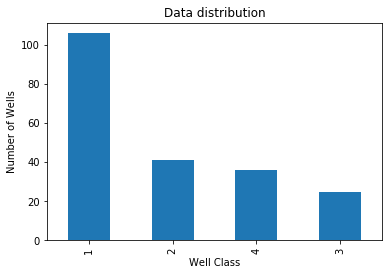

In [10]:
print(pd.value_counts(dataset['WellClass']))
pd.value_counts(dataset['WellClass']).plot.bar()
plt.title('Data distribution')
plt.xlabel('Well Class')
plt.ylabel('Number of Wells')
plt.savefig('Available_data_st.jpeg', dpi=300)
plt.show()


### Checking the variation of accuracy with respect to different parameters

1 0.4166666666666667
2 0.3055555555555556
3 0.3055555555555556
4 0.3333333333333333
5 0.3055555555555556
6 0.3611111111111111
7 0.3333333333333333
8 0.3333333333333333
9 0.2777777777777778
10 0.4444444444444444
11 0.3333333333333333
12 0.3611111111111111
13 0.25
14 0.3888888888888889
15 0.3888888888888889
16 0.3333333333333333
17 0.5
18 0.3333333333333333
19 0.3055555555555556
20 0.3333333333333333
21 0.3611111111111111
22 0.2777777777777778
23 0.4166666666666667
24 0.2777777777777778
25 0.3333333333333333
26 0.2777777777777778
27 0.2222222222222222
28 0.3333333333333333
29 0.3333333333333333
30 0.3055555555555556
31 0.2777777777777778
32 0.3888888888888889
33 0.3888888888888889
34 0.3888888888888889
35 0.4166666666666667
36 0.3611111111111111
37 0.3611111111111111
38 0.3888888888888889
39 0.4166666666666667
40 0.3611111111111111
41 0.2777777777777778
42 0.25
43 0.5
44 0.2777777777777778
45 0.2777777777777778
46 0.3333333333333333
47 0.4722222222222222
48 0.4444444444444444
49 0.361111

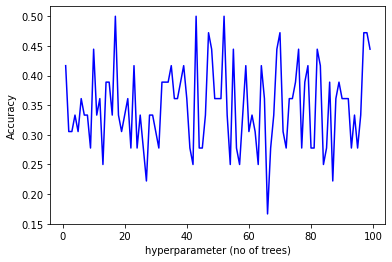

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
acc = []
for i in range(1,100):
   
        
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.2, random_state = i)
    classifier = RandomForestClassifier(n_estimators=10 ,random_state = 0)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))
    print(i,accuracy_score(y_test, y_pred))

plt.plot(range(1,100),acc, c = 'blue')
plt.xlabel('hyperparameter (no of trees)')
plt.ylabel('Accuracy')
plt.show()

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.3, random_state=69)

C:\Users\Bihari\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# Training Random Forest classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting Test Result

In [6]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 4]
 [1 1]
 [4 1]
 [4 4]
 [1 1]
 [1 1]
 [2 2]
 [1 3]
 [1 4]
 [1 2]
 [2 2]
 [1 4]
 [2 1]
 [1 3]
 [1 2]
 [4 1]
 [4 1]
 [3 1]
 [1 1]
 [4 2]
 [1 1]
 [2 2]
 [3 2]
 [1 4]
 [1 1]
 [2 1]
 [1 1]
 [1 4]
 [1 1]
 [4 1]
 [3 1]
 [1 1]
 [3 3]
 [4 4]
 [1 3]
 [2 1]
 [1 2]
 [2 1]
 [1 1]
 [1 4]
 [1 2]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [3 1]
 [2 2]
 [1 2]
 [1 1]
 [3 3]
 [1 1]
 [4 2]
 [1 1]]


# Evaluating accuracy

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test, y_pred)*100))  
print(cr)

k = cohen_kappa_score(y_test, y_pred)
print('kappa: %0.3f'%k)

Confusion Matrix: 

[[17  5  3  4]
 [ 5  4  1  2]
 [ 3  0  2  0]
 [ 5  0  0  3]]

overall Accuracy: 48.15 %
              precision    recall  f1-score   support

           1       0.57      0.59      0.58        29
           2       0.44      0.33      0.38        12
           3       0.33      0.40      0.36         5
           4       0.33      0.38      0.35         8

   micro avg       0.48      0.48      0.48        54
   macro avg       0.42      0.42      0.42        54
weighted avg       0.48      0.48      0.48        54

kappa: 0.176


## Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = x_train , y = y_train, cv = 10,)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 35.50 %
Standard Deviation: 8.56 %


# Feature Importance

In [65]:
import pandas as pd
feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = dataset.columns[2:-2],
                                    columns=['importance']).sort_values('importance',ascending=False)

            importance
MRVBF         0.078093
DFR           0.068925
Plan_C        0.067235
Profile_C     0.066549
MRRTF         0.065627
Alititude     0.064549
SCA           0.064359
DFF           0.062828
LS            0.061781
Lineam_D      0.056514
Drain_D       0.055878
Draw_D        0.055231
TRI           0.048188
TPI           0.046891
SPI           0.041592
TWI           0.036646
Slope         0.036361
LULC          0.014406
litho_recl    0.004386
geomorph_R    0.003959


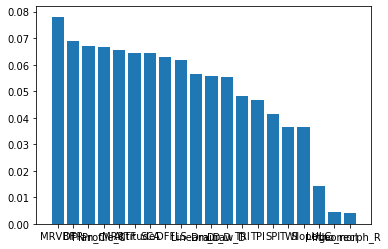

In [66]:
print(feature_importances)
plt.bar(feature_importances.index,feature_importances.iloc[:,-1].values, align='center', alpha = 1)
plt.show()

# predicting unlabled data

In [67]:
unlabeled = pd.read_csv('Data_unlabeled.csv')

x_unl = unlabeled.iloc[: , 2:].values
x_coordinates = unlabeled.iloc[:,:2]
unlabeled.head(10)

,x,y,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,...,SCA,Profile_C,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R
0,258143.343169,2.664110e+06,12.36240,8.60310,541.0,4.33529,0.16722,1.75086,0.0,0.16393,...,17.57359,-0.00098,-0.00084,2.48998,256.40796,0.12944,6.25581,0.64865,2.0,2.0
1,258233.343169,2.664110e+06,12.27924,8.59698,536.0,4.33185,0.16012,0.47551,0.0,1.84461,...,40.00359,-0.00244,-0.02385,1.00000,141.52002,0.03725,7.06296,-1.02703,2.0,2.0
2,258323.343169,2.664110e+06,12.19617,8.59179,535.0,4.32848,0.14855,0.90309,0.0,0.91355,...,36.81416,0.00071,0.00571,1.34164,225.42549,0.06861,7.31022,0.54054,2.0,2.0
3,258413.343169,2.664110e+06,12.11320,8.58755,536.0,4.32518,0.14352,1.06532,0.0,0.36503,...,17.57359,0.00220,0.01238,1.84391,113.97736,0.08951,6.68820,2.24324,2.0,2.0
4,258503.343169,2.664110e+06,12.03034,8.58425,537.0,4.32195,0.13879,0.44645,0.0,0.06206,...,22.16388,0.00089,0.00596,0.77460,36.82467,0.03725,7.46354,1.97297,4.0,2.0
5,258593.343169,2.664110e+06,11.94757,8.58189,530.0,4.31879,0.13477,1.07262,0.0,1.78328,...,45.05311,-0.00603,-0.07360,3.13050,483.79874,0.08314,6.73362,-4.02703,4.0,2.0
6,258683.343169,2.664110e+06,11.86491,8.58047,534.0,4.31569,0.13070,0.69362,0.0,0.05827,...,17.57359,0.00170,0.02702,1.34164,61.00688,0.06002,6.92963,1.56757,4.0,2.0
7,258773.343169,2.664110e+06,11.78236,8.58000,532.0,4.31266,0.12659,0.92361,0.0,0.97943,...,41.95362,-0.00221,-0.00000,1.41421,115.40007,0.06657,6.74746,-0.59459,4.0,2.0
8,258143.343169,2.664200e+06,12.32839,8.51334,535.0,4.32580,0.17574,1.00166,0.0,0.84130,...,187.56355,0.00227,-0.01712,1.48324,521.14337,0.06861,6.75585,0.35135,2.0,2.0
9,258233.343169,2.664200e+06,12.24500,8.50716,534.0,4.32241,0.17108,1.20406,0.0,0.33484,...,85.83942,0.00182,0.00387,1.89737,212.62872,0.09688,6.78160,2.32432,2.0,2.0


In [68]:
print(x_unl[0])

[ 1.24e+01  8.60e+00  5.41e+02  4.34e+00  1.67e-01  1.75e+00  0.00e+00
  1.64e-01  2.06e-01  4.00e+00  1.76e+01 -9.80e-04 -8.40e-04  2.49e+00
  2.56e+02  1.29e-01  6.26e+00  6.49e-01  2.00e+00  2.00e+00]


In [69]:
label = classifier.predict(x_unl)
print(label[0:5])

[4 2 4 4 1]


In [70]:
x_coordinates.head()

,x,y
0,258143.343169,2.664110e+06
1,258233.343169,2.664110e+06
2,258323.343169,2.664110e+06
3,258413.343169,2.664110e+06
4,258503.343169,2.664110e+06


In [71]:
x_coordinates['well_class'] = label

x_coordinates.head()

C:\Users\Bihari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,x,y,well_class
0,258143.343169,2.664110e+06,4
1,258233.343169,2.664110e+06,2
2,258323.343169,2.664110e+06,4
3,258413.343169,2.664110e+06,4
4,258503.343169,2.664110e+06,1


1    953079
4    455738
2    362828
3    278978
Name: well_class, dtype: int64


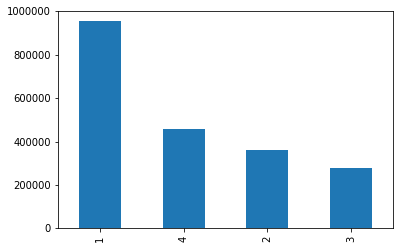

In [72]:
print(pd.value_counts(x_coordinates['well_class']))
pd.value_counts(x_coordinates['well_class']).plot.bar()

In [73]:
#exporting the data
x_coordinates.to_csv('prediction_rf_rw.csv')

# Grid search (in colab only)

In [75]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': list(np.arange(1,100,10)), 'criterion': ['gini','entropy'],'max_depth': list(np.arange(1,50))}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 39.20 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 81}


C:\Users\Bihari\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
